# Feminism 

https://medium.com/aimonks/building-a-simple-text-classifier-using-large-language-models-1a6acadcee7d

In [1]:
from helpers import *
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
 
# Just fill this with wherever is your main data folder is (copy the path just before 'MovieSummaries'):
file_source = '/Volumes/LaCie/ADA/2024/Projet/'
#"/Users/Mathieu/Documents/Docs epfl/Semester3/Advanced Data Analysis (ADA)/Test VSCode/ada-2024-project-theadavengers 2/"

# Same goes for the reviews dataset : but simply copy the entire path of where your reviews data is... 
reviews_path = '/Users/shrinidhivelan/Downloads/TMDB_movie_dataset_v11.csv'
#"/Users/Mathieu/Downloads/reviews dataset/TMDB_movie_dataset_v11.csv"

# replace the following by the direct path of where  [(2) bechdel test dataset] your bechdel test movie data is:
bechdel_path = '/Users/shrinidhivelan/Desktop/DATA ADA Projet/movies.csv'#'/Users/shrinidhivelan/Downloads/movies.csv'
#"/Users/Mathieu/Downloads/movies.csv"

# replace the following by the direct path of where  [(1) feminism dataset] your bechdel test movie data is:
bechdel_path2 = "/Users/shrinidhivelan/Desktop/DATA ADA Projet/(1) Feminism/movies.csv"

### creating dataset by extracting the main CMU data ###
MovieMetadata_df, CharacterMetadata_df, names_df, plot_summaries_df, tvTropes_df, merged_Movie = create_datasets(file_source, reviews_path)

reviews = pd.read_csv(reviews_path)

MovieMetadata_df['Country dictionnaire'] = MovieMetadata_df['Movie countries (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Genre dictionnaire'] = MovieMetadata_df['Movie genres (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Language dictionnaire'] = MovieMetadata_df['Movie languages (Freebase ID:name tuples)'].apply(ast.literal_eval)


### Merge the movie summaries with movie names 

movie_names_summaries_df = pd.merge(plot_summaries_df, MovieMetadata_df, on='Wikipedia movie ID', how='left')
movie_names_character_df = pd.merge(CharacterMetadata_df, MovieMetadata_df, on='Wikipedia movie ID', how='left')


### Bechdel data - the scores of the bechdel tests
bechdel_2= pd.read_csv(bechdel_path2)
Movie_data_bechdel_notation_df = pd.merge(MovieMetadata_df, bechdel_2[["title", "year", "bt_score"]], left_on="Movie name", right_on="title", how="inner")


### Data to do labels for model (using texts):
summaries_bechdel_movies_df = pd.merge(plot_summaries_df, Movie_data_bechdel_notation_df, on='Wikipedia movie ID', how='inner')
summaries_label = summaries_bechdel_movies_df[['Summaries', 'Movie name', 'bt_score']]


In [ ]:
feminism_indicator = summaries_label.copy()
feminism_indicator['feminism'] = feminism_indicator['bt_score'].apply(lambda x: 1 if x == 3 else 0)
non_feminist = feminism_indicator[feminism_indicator['feminism'] == 0]
non_feminist = non_feminist.drop(columns = ['bt_score'])
non_feminist = non_feminist.sample(n=296, random_state=42)  # random_state ensures reproducibility

feminism_movies = pd.read_csv("feminist_movies_plots.csv")
feminist = feminism_movies[['Summaries', 'Movie name']]
feminist['feminism'] = 1


result = pd.concat([non_feminist, feminist], ignore_index=True)  # ignore_index reindexes the rows

# Assuming your DataFrame is named df
result = result.sample(frac=1, random_state=42)  # frac=1 means shuffle all rows

# If you want to reset the index after shuffling (optional):
result.reset_index(drop=True, inplace=True)

display(result)

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_57422/1951247110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feminist['feminism'] = 1


,Summaries,Movie name,feminism
0,Doris Attinger follows her husband with a gu...,Adam's Rib,1
1,The film focuses on the March sisters - beauti...,Little Women,1
2,"In the fictional metropolis of Champion City, ...",Mystery Men,0
3,"Dr. Richard Kimble, a successful vascular surg...",The Fugitive,0
4,Thirteen-year-old Tracy Freeland writes poetr...,Thirteen,1
...,...,...,...
587,"Ezekiel Cobb, a naive young man raised by miss...",The Cat's-Paw,0
588,Cobra is the short form of Co-brothers . As th...,Cobra,0
589,A man throws away an old television set on a N...,Pixels,0
590,A young mute woman is raped and becomes pregna...,The Young Girl,1


In [29]:
from datasets import Dataset

# Create a dictionary from your DataFrame
data_dict = {
    'Summaries': result['Summaries'].tolist(),
    'feminism': result['feminism'].tolist()
}

# Create a dataset from the dictionary
dataset = Dataset.from_dict(data_dict)

# Check the dataset
print(dataset)

Dataset({
    features: ['Summaries', 'feminism'],
    num_rows: 592
})


In [30]:
# Splitting into train and test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset['train']
test_dataset = dataset['test']

In [31]:
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

# Sample data
print(train_dataset[0])

Training samples: 473
Testing samples: 119
{'Summaries': ' At the Central Park Zoo in Manhattan, New York City, Serbian-born fashion designer Irena Dubrovna makes sketches of a black panther. She catches the attention of marine engineer Oliver Reed, who strikes up a conversation. Irena invites him to her apartment for tea. As they walk away, one of Irena\'s discarded sketches is revealed as a panther impaled by a sword. At her apartment, Oliver is intrigued by a statue of a medieval warrior on horseback impaling a large cat with his sword. Irena informs Oliver that the figure is King John of Serbia and that the cat represents evil. According to legend, long ago the Christian residents of her home village gradually turned to witchcraft and devil worship after being enslaved by the Mameluks. When King John drove the Mameluks out and saw what the villagers had become, he had them killed. However, "the wisest and the most wicked" escaped into the mountains. Oliver buys her a kitten, but up

In [33]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  # GPT2 does not have a pad token by default

In [34]:
def tokenize(batch):
    return tokenizer(batch['Summaries'], padding=True, truncation=True, max_length=128)

In [35]:
train_dataset = train_dataset.map(tokenize, batched=True, batch_size=len(train_dataset))
test_dataset = test_dataset.map(tokenize, batched=True, batch_size=len(test_dataset))

# Setting format for PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'feminism'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'feminism'])

Map:   0%|          | 0/473 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

In [36]:
from transformers import GPT2Model

gpt_model = GPT2Model.from_pretrained('gpt2')

In [37]:
import torch
import torch.nn as nn

class GPTClassifier(nn.Module):
    def __init__(self, gpt_model, num_classes):
        super(GPTClassifier, self).__init__()
        self.gpt = gpt_model
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.gpt.config.hidden_size, num_classes)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.gpt(input_ids=input_ids, attention_mask=attention_mask)
        # Using the last hidden state of the last token
        last_hidden_state = outputs.last_hidden_state
        pooled_output = last_hidden_state[:, -1, :]  # (batch_size, hidden_size)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

In [38]:
num_classes = 2  # 'spam' or 'ham'
model = GPTClassifier(gpt_model, num_classes)

In [39]:
from torch.utils.data import DataLoader
from transformers import AdamW
from tqdm import tqdm

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)

/Users/shrinidhivelan/miniconda3/envs/ada/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    correct_predictions = 0
    
    for batch in tqdm(loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['feminism'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
    
    return total_loss / len(loader), correct_predictions.double() / len(loader.dataset)

def eval_model(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch in tqdm(loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['feminism'].to(device)
            
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
    
    return total_loss / len(loader), correct_predictions.double() / len(loader.dataset)

In [41]:
num_epochs = 3
best_accuracy = 0

train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    test_loss, test_acc = eval_model(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
    
    # Saving the best model
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        torch.save(model.state_dict(), 'best_model_state_feminism.bin')

Epoch 1/3


100%|██████████| 15/15 [00:05<00:00,  2.55it/s]


Train Loss: 0.8698, Train Acc: 0.5581
Test Loss: 0.6618, Test Acc: 0.5798
Epoch 2/3


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


Train Loss: 0.4740, Train Acc: 0.7886
Test Loss: 0.5486, Test Acc: 0.7563
Epoch 3/3


100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


Train Loss: 0.3089, Train Acc: 0.8668
Test Loss: 0.5461, Test Acc: 0.7899


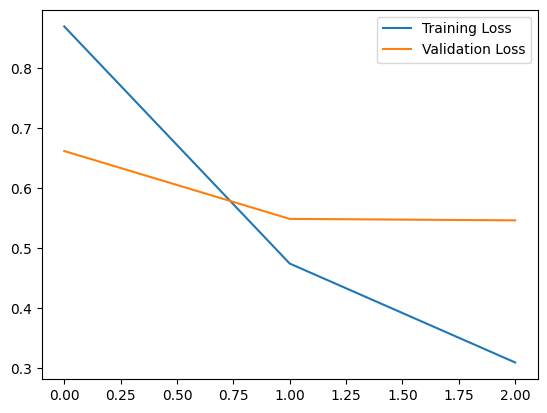

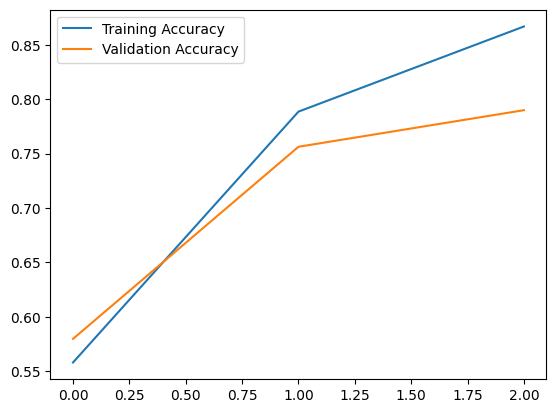

In [42]:
import matplotlib.pyplot as plt

# Loss Plot
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.legend()
plt.show()

# Accuracy Plot
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.legend()
plt.show()

In [16]:
model.load_state_dict(torch.load('best_model_state.bin'))

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_53482/3345549263.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_

<All keys matched successfully>

In [43]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['feminism'].to(device)
        
        outputs = model(input_ids, attention_mask)
        _, preds = torch.max(outputs, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        58
           1       0.73      0.93      0.82        61

    accuracy                           0.79       119
   macro avg       0.82      0.79      0.78       119
weighted avg       0.81      0.79      0.78       119



In [45]:
def predict_text(text):
    model.eval()
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=128, padding=True)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask)
        _, preds = torch.max(outputs, dim=1)
        label = 1 if preds.item() == 1 else 0
    return label

# Trial
sample_text = 'Conflict and Conquest: Central to a feminine plot is a clear conflict, often framed as a battle or competition. The hero may confront external forces (like friends, societal expectations, or natural obstacles) or internal strength (like personal flaws or emotional growth).'
print(f"Message: {sample_text}")
print(f"Prediction: {predict_text(sample_text)}")

Message: Conflict and Conquest: Central to a feminine plot is a clear conflict, often framed as a battle or competition. The hero may confront external forces (like friends, societal expectations, or natural obstacles) or internal strength (like personal flaws or emotional growth).
Prediction: 1


In [46]:
from tqdm import tqdm
#movie_names_summaries_df['feminism'] = movie_names_summaries_df['Summaries'].apply(lambda x: predict_text(x))
table_summaries = movie_names_summaries_df['Summaries'].values
table_predictions = []
for summary in tqdm(table_summaries, desc="Processing Summaries"):
    table_predictions.append(predict_text(summary))


Processing Summaries: 100%|██████████| 42303/42303 [1:00:25<00:00, 11.67it/s]


In [47]:
movie_names_summaries_df['feminism'] = table_predictions

In [48]:
movie_names_summaries_df

,Wikipedia movie ID,Summaries,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Year,Country dictionnaire,Genre dictionnaire,Language dictionnaire,feminism
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,1990-09-07,NaN,110.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/0f8l9c"": ""France"", ""/m/05vz3zq"": ""Soviet ...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",1990,"{'/m/0f8l9c': 'France', '/m/05vz3zq': 'Soviet ...","{'/m/07s9rl0': 'Drama', '/m/03q4nz': 'World ci...",{'/m/06b_j': 'Russian Language'},1
1,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",2012,{'/m/09c7w0': 'United States of America'},"{'/m/03btsm8': 'Action/Adventure', '/m/06n90':...",{'/m/02h40lc': 'English Language'},1
2,20663735,Poovalli Induchoodan is sentenced for six yea...,/m/051zjwb,Narasimham,2000,NaN,175.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",2000,{'/m/03rk0': 'India'},"{'/m/04t36': 'Musical', '/m/02kdv5l': 'Action'...",{'/m/0999q': 'Malayalam Language'},0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",/m/06xtz3,The Lemon Drop Kid,1951-03-08,2300000.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",1951,{'/m/09c7w0': 'United States of America'},"{'/m/06qm3': 'Screwball comedy', '/m/01z4y': '...",{'/m/02h40lc': 'English Language'},1
4,595909,Seventh-day Adventist Church pastor Michael Ch...,/m/02tqm5,A Cry in the Dark,1988-11-03,6908797.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,"{'/m/09c7w0': 'United States of America', '/m/...","{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",{'/m/02h40lc': 'English Language'},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",/m/0j3dcl6,Oomakkuyil Padumbol,2012-02-17,NaN,NaN,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/0bj8m2"": ""Children's""}",2012,{'/m/03rk0': 'India'},{'/m/0bj8m2': 'Children's'},{'/m/0999q': 'Malayalam Language'},1
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",/m/045pct,The Last Command,1928,NaN,88.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",1928,{'/m/09c7w0': 'United States of America'},"{'/m/06ppq': 'Silent film', '/m/0219x_': 'Indi...","{'/m/06ppq': 'Silent film', '/m/02h40lc': 'Eng...",0
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,/m/0j6777g,Randy Parsons: American Luthier,2011-10-04,NaN,8.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...",2011,{'/m/09c7w0': 'United States of America'},"{'/m/02hmvc': 'Short Film', '/m/04rlf': 'Music...",{'/m/02h40lc': 'English Language'},1
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",/m/04f7jfs,Kabuliwala,1961-12-14,NaN,134.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",1961,{'/m/03rk0': 'India'},{'/m/07s9rl0': 'Drama'},{'/m/03k50': 'Hindi Language'},0


In [49]:
movie_names_summaries_df.to_csv('movie_feminism_dataset_gpt2_prediction.csv')

In [85]:
movie_names_summaries_df

,Wikipedia movie ID,Summaries,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Year,Country dictionnaire,Genre dictionnaire,Language dictionnaire,feminism
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,1990-09-07,NaN,110.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/0f8l9c"": ""France"", ""/m/05vz3zq"": ""Soviet ...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",1990,"{'/m/0f8l9c': 'France', '/m/05vz3zq': 'Soviet ...","{'/m/07s9rl0': 'Drama', '/m/03q4nz': 'World ci...",{'/m/06b_j': 'Russian Language'},0
1,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",2012,{'/m/09c7w0': 'United States of America'},"{'/m/03btsm8': 'Action/Adventure', '/m/06n90':...",{'/m/02h40lc': 'English Language'},1
2,20663735,Poovalli Induchoodan is sentenced for six yea...,/m/051zjwb,Narasimham,2000,NaN,175.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",2000,{'/m/03rk0': 'India'},"{'/m/04t36': 'Musical', '/m/02kdv5l': 'Action'...",{'/m/0999q': 'Malayalam Language'},0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",/m/06xtz3,The Lemon Drop Kid,1951-03-08,2300000.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",1951,{'/m/09c7w0': 'United States of America'},"{'/m/06qm3': 'Screwball comedy', '/m/01z4y': '...",{'/m/02h40lc': 'English Language'},0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,/m/02tqm5,A Cry in the Dark,1988-11-03,6908797.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,"{'/m/09c7w0': 'United States of America', '/m/...","{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",{'/m/02h40lc': 'English Language'},1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",/m/0j3dcl6,Oomakkuyil Padumbol,2012-02-17,NaN,NaN,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/0bj8m2"": ""Children's""}",2012,{'/m/03rk0': 'India'},{'/m/0bj8m2': 'Children's'},{'/m/0999q': 'Malayalam Language'},1
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",/m/045pct,The Last Command,1928,NaN,88.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",1928,{'/m/09c7w0': 'United States of America'},"{'/m/06ppq': 'Silent film', '/m/0219x_': 'Indi...","{'/m/06ppq': 'Silent film', '/m/02h40lc': 'Eng...",0
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,/m/0j6777g,Randy Parsons: American Luthier,2011-10-04,NaN,8.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...",2011,{'/m/09c7w0': 'United States of America'},"{'/m/02hmvc': 'Short Film', '/m/04rlf': 'Music...",{'/m/02h40lc': 'English Language'},0
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",/m/04f7jfs,Kabuliwala,1961-12-14,NaN,134.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",1961,{'/m/03rk0': 'India'},{'/m/07s9rl0': 'Drama'},{'/m/03k50': 'Hindi Language'},0


In [84]:
len(movie_names_summaries_df[movie_names_summaries_df['feminism'] == 0])/len(movie_names_summaries_df)

0.6769259863366665

# Here is the entire pipeline for reusability

In [ ]:
from datasets import Dataset
from transformers import GPT2Tokenizer
from transformers import GPT2Model
import torch
from torch.utils.data import DataLoader
from transformers import AdamW
from tqdm import tqdm
import torch.nn as nn



"""
Insert your table where you want to train the model for feminism classification :
    - It should have a column Summaries (if not replace the name of the column by Summaries) for the summaries
    - It should have a column feminism (if not replace the name of the column) which corresponds to the labels
"""

# Create a dictionary from your DataFrame
data_dict = {
    'Summaries': feminism_indicator['Summaries'].tolist(),
    'feminism': feminism_indicator['feminism'].tolist()
}

# Create a dataset from the dictionary
dataset = Dataset.from_dict(data_dict)

# Check the dataset
print(dataset)

# Splitting into train and test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset['train']
test_dataset = dataset['test']


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  # GPT2 does not have a pad token by default

def tokenize(batch):
    return tokenizer(batch['Summaries'], padding=True, truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True, batch_size=len(train_dataset))
test_dataset = test_dataset.map(tokenize, batched=True, batch_size=len(test_dataset))

# Setting format for PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'feminism'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'feminism'])



gpt_model = GPT2Model.from_pretrained('gpt2')


class GPTClassifier(nn.Module):
    def __init__(self, gpt_model, num_classes):
        super(GPTClassifier, self).__init__()
        self.gpt = gpt_model
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.gpt.config.hidden_size, num_classes)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.gpt(input_ids=input_ids, attention_mask=attention_mask)
        # Using the last hidden state of the last token
        last_hidden_state = outputs.last_hidden_state
        pooled_output = last_hidden_state[:, -1, :]  # (batch_size, hidden_size)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

num_classes = 2  
model = GPTClassifier(gpt_model, num_classes)


# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    correct_predictions = 0
    
    for batch in tqdm(loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['feminism'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
    
    return total_loss / len(loader), correct_predictions.double() / len(loader.dataset)

def eval_model(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch in tqdm(loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['feminism'].to(device)
            
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
    
    return total_loss / len(loader), correct_predictions.double() / len(loader.dataset)

num_epochs = 3
best_accuracy = 0

train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    test_loss, test_acc = eval_model(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
    
    # Saving the best model
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        torch.save(model.state_dict(), 'best_model_state.bin')